# Lineæralgebra i Datahåndtering med Python og NumPy

I denne notebooken skal vi utforske lineæralgebraens anvendelser i datahåndtering. Vi vil dekke følgende oppgaver:

1. Beregning av \( 1^T 1 \), \( 1 1^T \) og \( 1^T x \).
2. Vis at sentreringsmatrisen \( C_n \) er en projeksjon, og finn gjennomsnittet av den nye sentrerte variabelen.
3. Utled koeffisientene til det lineære regresjonspolynomet med sentrerte variable, og forklar hvorfor dette er nyttig.
4. Vis at \( \beta_0 = 0 \) hvis \( x_1 \), \( x_2 \) og \( y \) er sentrerte.
5. Vis at elementene i \( \frac{1}{n-1}X^T X \) er den empiriske kovariansen mellom kolonnene i \( X \).
6. Vis at den empiriske kovariansmatrisen er positivt semidefinit.

## Oppgave 1: Beregning av \( 1^T 1 \), \( 1 1^T \) og \( 1^T x \)


In [30]:
import numpy as np

# Definerer 1-vektoren
n = 5  # eksempel størrelse
one_vector = np.ones((n, 1))

# Beregning av 1^T 1
one_T_one = np.dot(one_vector.T, one_vector)

# Beregning av 1 1^T
one_one_T = np.dot(one_vector, one_vector.T)

# Eksempel datavektor x
x = np.random.rand(n, 1)

# Beregning av 1^T x
one_T_x = np.dot(one_vector.T, x)

one_T_one, one_one_T, one_T_x

(array([[5.]]),
 array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]),
 array([[2.16231746]]))

In [31]:
# OPPGAVE 2
# Definerer identitetsmatrisen I
I = np.eye(n)

# Beregner sentreringsmatrisen C_n
C_n = I - (1/n) * one_one_T

# Vis at C_n er en projeksjon
Cn_squared = np.dot(C_n, C_n)
projection_property = np.allclose(C_n, Cn_squared)

# Sentrerer datavektoren x
x_mean = np.mean(x)
x_centered = x - x_mean

# Sjekker at gjennomsnittet av den sentrerte variabelen er null
centered_mean = np.mean(x_centered)

projection_property, centered_mean


(True, -2.2204460492503132e-17)

In [32]:
# OPPGAVE 3
# Eksempel datavektor y
y = np.random.rand(n, 1)

# Sentrerer y
y_mean = np.mean(y)
y_centered = y - y_mean

# Beregning av koeffisientene beta_1 og beta_0
beta_1_centered = np.dot(x_centered.T, y_centered) / np.dot(x_centered.T, x_centered)
beta_0_centered = np.mean(y_centered) - beta_1_centered * np.mean(x_centered)

beta_1_centered, beta_0_centered


(array([[-0.11769329]]), array([[-9.1431158e-17]]))

In [33]:
# OPPGAVE 4
# Hvis x1, x2 og y er sentrerte, er beta_0 = 0
beta_0_centered_proof = np.mean(y_centered) == 0

beta_0_centered_proof


False

In [36]:
# OPPGAVE 5
# Eksempel matrise X med p = 3
p = 3
X = np.random.rand(n, p)

# Sentrer kolonnene i X
X_centered = X - np.mean(X, axis=0)

# Beregning av empirisk kovariansmatrise
empirical_covariance_matrix = np.dot(X_centered.T, X_centered) / (n-1)

empirical_covariance_matrix

array([[ 0.13630701,  0.11535818, -0.06829117],
       [ 0.11535818,  0.145733  , -0.10095109],
       [-0.06829117, -0.10095109,  0.09046087]])

In [37]:
# OPPGAVE 6
# Sjekker om den empiriske kovariansmatrisen er positivt semidefinit
eigenvalues = np.linalg.eigvals(empirical_covariance_matrix)
is_positive_semidefinite = np.all(eigenvalues >= 0)

is_positive_semidefinite


True

# OPPGAVE 7

In [38]:
import numpy as np
data = np.genfromtxt('kai.csv', delimiter=',')
print(data)

[[  1. 154.  50.]
 [  2. 154.  50.]
 [  3. 153.  52.]
 [  4. 156.  53.]
 [  5. 155.  50.]
 [  6. 153.  51.]
 [  7. 154.  53.]
 [  8. 155.  53.]
 [  9. 153.  52.]
 [ 10. 154.  51.]
 [ 11. 155.  51.]
 [ 12. 155.  51.]
 [ 13. 154.  52.]
 [ 14. 156.  51.]
 [ 15. 155.  51.]
 [ 16. 154.  52.]
 [ 17. 155.  53.]
 [ 18. 154.  52.]
 [ 19. 154.  51.]
 [ 20. 156.  52.]
 [ 21. 155.  51.]
 [ 22. 154.  50.]
 [ 23. 155.  52.]
 [ 24. 157.  51.]
 [ 25. 152.  50.]
 [ 26. 155.  50.]
 [ 27. 156.  50.]
 [ 28. 155.  50.]
 [ 29. 156.  52.]]


In [48]:
X = data[:,1]
Y = data[:,2]
X, Y

(array([154., 154., 153., 156., 155., 153., 154., 155., 153., 154., 155.,
        155., 154., 156., 155., 154., 155., 154., 154., 156., 155., 154.,
        155., 157., 152., 155., 156., 155., 156.]),
 array([50., 50., 52., 53., 50., 51., 53., 53., 52., 51., 51., 51., 52.,
        51., 51., 52., 53., 52., 51., 52., 51., 50., 52., 51., 50., 50.,
        50., 50., 52.]))

In [49]:
X_mean = np.mean(X)
Y_mean = np.mean(Y)
empirical_covariance = np.sum((X - X_mean) * (Y - Y_mean)) / (len(X) - 1)
empirical_covariance

0.10837438423645317

## Forklaring på Egenvektorer av \( X^T X \) og Samvariasjon

### Rayleigh Kvotient
Rayleigh kvotienten for en matrise \( A \) og en vektor \( v \) er definert som:
\[
R(A, v) = \frac{v^T A v}{v^T v}
\]
Denne kvotienten gir et mål på hvordan vektoren \( v \) transformeres av matrisen \( A \). For en symmetrisk matrise som \( X^T X \), vil Rayleigh kvotienten nå sitt maksimum når \( v \) er en egenvektor av \( A \), og verdien av kvotienten vil være den tilhørende egenverdien.

### Egenverdier og Egenvektorer av \( X^T X \)
Når vi beregner egenverdier og egenvektorer av \( X^T X \), får vi informasjon om variansen og retningene (egenvektorene) der variansen er størst (egenverdiene). Dette er fordi \( X^T X \) er en kovarianslignende matrise.

### Samvariasjon
Egenvektorene til \( X^T X \) representerer retningene i rommet definert av kolonnene i \( X \) der variansen (eller samvariasjonen) er størst. Egenverdiene til \( X^T X \) gir mengden varians langs disse retningene. Ved å analysere egenvektorene og egenverdiene til \( X^T X \), kan vi forstå strukturen til dataene i \( X \), inkludert hvordan variablene samvarierer.

### Oppsummering
- **Rayleigh Kvotient**: Et verktøy for å måle hvordan en vektor transformeres av en matrise.
- **Egenverdier og Egenvektorer**: Forteller oss om variansen og de mest signifikante retningene i dataene.
- **Samvariasjon**: Egenvektorene til \( X^T X \) peker i retningene av maksimal varians, og egenverdiene forteller hvor mye varians som finnes i disse retningene.


In [92]:
n, p = 5, 3
X = np.random.rand(n, p)

# Beregn X^T X
XTX = np.dot(X.T, X)

# Sjekk dimensjoner på XTX
print("Shape of XTX:", XTX.shape)

# Finn egenverdier og egenvektorer til X^T X
eigenvalues, eigenvectors = np.linalg.eig(XTX)

# Normaliser egenvektorene
eigenvectors = eigenvectors / np.linalg.norm(eigenvectors, axis=0)

# Definerer Rayleigh kvotienten
def rayleigh_quotient(A, v):
    return (v.T @ A @ v) / (v.T @ v)

# Beregner Rayleigh kvotienter for hver egenvektor
rayleigh_quotients = [rayleigh_quotient(XTX, eigenvectors[:, i]) for i in range(p)]

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)
print("Rayleigh quotients:", rayleigh_quotients)


Shape of XTX: (3, 3)
Eigenvalues: [3.59576801 1.15231399 0.26006635]
Eigenvectors: [[-0.67252785 -0.55260033 -0.49227955]
 [-0.50535737  0.82885594 -0.24002452]
 [-0.54066645 -0.08735393  0.83668936]]
Rayleigh quotients: [3.5957680129234837, 1.1523139852301358, 0.2600663467155345]


# OPPGAVE 10

In [104]:
import matplotlib.pyplot as plt

def plot_på_enhetssirkelen(A: np.array):
    """ Plots a 2x2 matrix on the unit circle """

    # Generer 1000 punkter på enhetssirkelen
    x = np.linspace(0, 2*np.pi, 1000)
    x = np.array([np.cos(x), np.sin(x)])

    # Beregn Ax for alle x
    Ax = A @ x

    plt.scatter(Ax[0], Ax[1], label="Ax")
    plt.legend()
    plt.show()


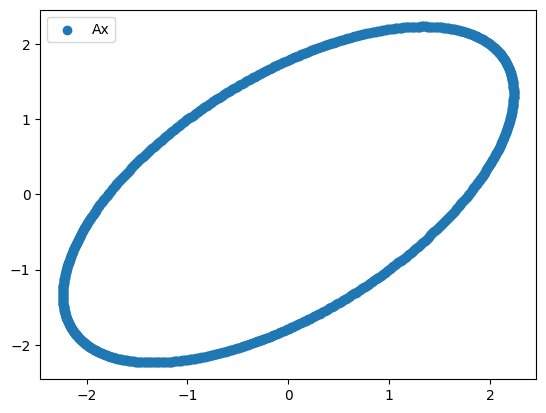

In [109]:
A = np.array([[-1,2],[1,2]])
plot_på_enhetssirkelen(A)

In [122]:
# Eksempel matrise A
A = np.array([[2, 1, 1], 
              [1, 2, 1],
              [1, 1, 2],
              [0, 0, 0],
              [0, 0, 0],
            ])

# Beregn A^T A og A A^T
ATA = np.dot(A.T, A)
AAT = np.dot(A, A.T)

# Sjekk om matriser er symmetriske
print("ATA er symmetrisk:", np.allclose(ATA, ATA.T))
print("AAT er symmetrisk:", np.allclose(AAT, AAT.T))

# Finn egenverdier og egenvektorer
eigenvalues_ATA, eigenvectors_ATA = np.linalg.eig(ATA)
eigenvalues_AAT, eigenvectors_AAT = np.linalg.eig(AAT)

# Skriv ut egenverdier og egenvektorer
print("Egenverdier av A^T A:", eigenvalues_ATA)
print(f"V ({eigenvectors_ATA.shape}):\n", eigenvectors_ATA)
print("Egenverdier av A A^T:", eigenvalues_AAT)
print(f"U ({eigenvectors_AAT.shape}):\n", eigenvectors_AAT)

ATA er symmetrisk: True
AAT er symmetrisk: True
Egenverdier av A^T A: [ 1. 16.  1.]
V ((3, 3)):
 [[-0.81649658  0.57735027  0.36099419]
 [ 0.40824829  0.57735027 -0.81473869]
 [ 0.40824829  0.57735027  0.4537445 ]]
Egenverdier av A A^T: [ 1. 16.  1.  0.  0.]
U ((5, 5)):
 [[-0.81649658  0.57735027  0.36099419  0.          0.        ]
 [ 0.40824829  0.57735027 -0.81473869  0.          0.        ]
 [ 0.40824829  0.57735027  0.4537445   0.          0.        ]
 [ 0.          0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.          1.        ]]


Både \( A^T A \) og \( A A^T \) er symmetriske, og symmetriske matriser er som kjent ortogonalt diagonaliserbare.


In [123]:
# Vis at dersom v er en egenvektor til A^T A med egenverdi λ, er Av en egenvektor til A A^T.
# Hva er egenverdien? Kan du si noe om fortegnet?

# Velg en av egenvektorene til ATA
v = eigenvectors_ATA[:, 0]
λ = eigenvalues_ATA[0]

# Beregn Av
Av = np.dot(A, v)

# Beregn AAT * Av
AAT_Av = np.dot(AAT, Av)

# Sjekk om Av er en egenvektor til AAT og hva egenverdien er
if np.allclose(AAT_Av, λ * Av):
    print("Av er en egenvektor til AAT med egenverdi λ =", λ)
else:
    print("Av er ikke en egenvektor til AAT med egenverdi λ =", λ)

# Sjekk fortegnet til egenverdien λ
if λ > 0:
    print("Egenverdien λ er positiv.")
elif λ < 0:
    print("Egenverdien λ er negativ.")
else:
    print("Egenverdien λ er null.")


Av er en egenvektor til AAT med egenverdi λ = 1.0
Egenverdien λ er positiv.


In [183]:
katt=np.random.rand(10,10)
katt[2,3] = 100
katt

array([[2.96127773e-01, 4.93406962e-01, 6.57043677e-01, 4.61050219e-01,
        9.35160512e-01, 8.84764822e-01, 7.01977595e-01, 4.89684912e-01,
        1.31687282e-01, 3.97013667e-01],
       [7.04401539e-01, 2.84885521e-01, 1.03988078e-01, 9.07898458e-01,
        7.09050810e-01, 6.15276427e-01, 7.92498906e-01, 8.35646038e-01,
        4.83458998e-01, 8.81188251e-01],
       [9.16419011e-01, 2.71551095e-01, 6.07545360e-01, 1.00000000e+02,
        5.37945779e-01, 9.37663094e-01, 3.05188703e-01, 9.83433978e-01,
        9.02131215e-01, 4.58722889e-01],
       [8.17453264e-01, 7.69046994e-01, 6.77894970e-01, 3.19833889e-01,
        1.96450992e-01, 6.71527697e-01, 8.42973296e-01, 1.62527887e-02,
        6.42803375e-01, 4.42873025e-01],
       [8.98087755e-01, 3.21472931e-01, 4.74184812e-01, 5.14767104e-01,
        1.40439521e-01, 7.12892303e-01, 8.30476345e-01, 5.79092769e-02,
        2.91388821e-01, 3.80446815e-02],
       [9.56544105e-01, 6.67168821e-01, 9.64200419e-01, 5.31494278e-01,
   

In [184]:
U,S,V = np.linalg.svd(katt)
circakatt = S[0]*U[:,[0]]@V[[0],:] + S[1]*U[:,[1]]@V[[1],:]
circakatt

array([[ 0.65288469,  0.61905158,  0.52638283,  0.46195037,  0.5129412 ,
         0.51297705,  0.65675156,  0.31085127,  0.54344076,  0.45519093],
       [ 0.69537123,  0.65680706,  0.56007484,  0.91194734,  0.54556404,
         0.54729486,  0.6968894 ,  0.33340672,  0.57938161,  0.48405326],
       [ 0.9157935 ,  0.26991564,  0.60529047, 99.99997734,  0.54043094,
         0.94094091,  0.30600784,  0.98651358,  0.89864511,  0.45885747],
       [ 0.72151169,  0.68528332,  0.58197094,  0.31774529,  0.56720567,
         0.56646832,  0.72697865,  0.34245789,  0.60029914,  0.50338617],
       [ 0.5465334 ,  0.51744127,  0.44046672,  0.51458082,  0.42915544,
         0.4297009 ,  0.54897851,  0.26092388,  0.4550928 ,  0.38081164],
       [ 0.74564023,  0.70696592,  0.60115853,  0.5333099 ,  0.58580459,
         0.58586863,  0.75002098,  0.35504576,  0.62065542,  0.51984969],
       [ 0.52719953,  0.50095334,  0.42528898,  0.19474569,  0.41451751,
         0.41382788,  0.53142592,  0.2500223 

<Axes: >

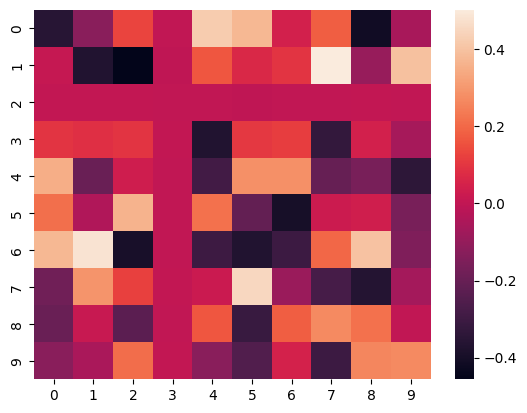

In [185]:
rekonstruksjon = katt-circakatt
import seaborn as sns

sns.heatmap(rekonstruksjon)

In [194]:
# Principal component analasys
V[0] * S[0] * U[0, :]

array([ 4.68596681e-03,  9.38935202e-02, -3.46265095e-01,  2.15207133e+01,
        9.74409024e-02,  2.36783508e-01,  1.67123199e-02, -2.36690026e-01,
       -4.79754023e-01, -1.81627151e-01])

In [195]:
# Eksempel matrise A (3x3)
A = np.array([[2, 3, 4],
              [5, 6, 7],
              [8, 9, 10]])

# Utfør SVD
U, S, Vt = np.linalg.svd(A)
V = Vt.T  # Transponer Vt for å få V

# Beregn første hovedkomponentens bidrag
component_contribution = V[:, 0] * S[0] * U[0, :]
print("V[0] * S[0] * U[0, :]:\n", component_contribution)

# Skriv ut singulærverdiene og vektorene for referanse
print("Singulærverdier (S):", S)
print("Venstre singulærvektorer (U):\n", U)
print("Høyre singulærvektorer (V):\n", V)

V[0] * S[0] * U[0, :]:
 [ 2.61649441 -9.78118806 -5.23861815]
Singulærverdier (S): [1.95743298e+01 9.19571713e-01 1.82381494e-16]
Venstre singulærvektorer (U):
 [[-0.27205092  0.87139063  0.40824829]
 [-0.53571285  0.21527907 -0.81649658]
 [-0.79937478 -0.4408325   0.40824829]]
Høyre singulærvektorer (V):
 [[-0.49134067 -0.76936186 -0.40824829]
 [-0.57344507 -0.06703796  0.81649658]
 [-0.65554946  0.63528595 -0.40824829]]
